## Credit Card Fraud Detection
### Support-Vector Machines (SVM)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import math

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Round up the value to the nearest integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

#### Let's check 1st file: /kaggle/input/creditcard.csv

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


Let's take a quick look at what the data looks like:

In [6]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Distribution graphs (histogram/bar graph) of sampled columns:

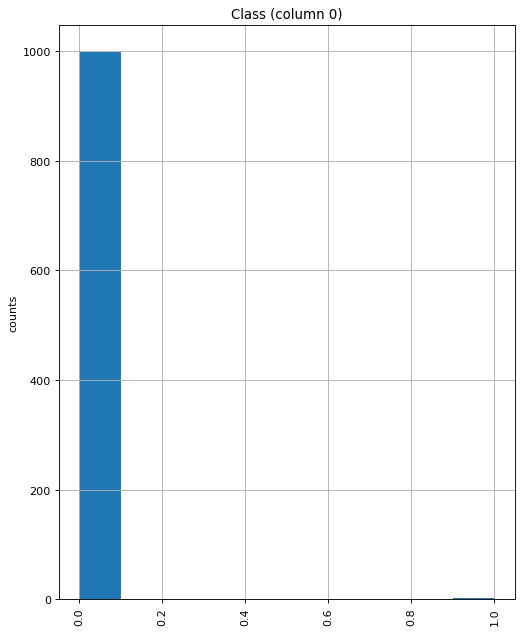

In [7]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

/tmp/ipykernel_6664/128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


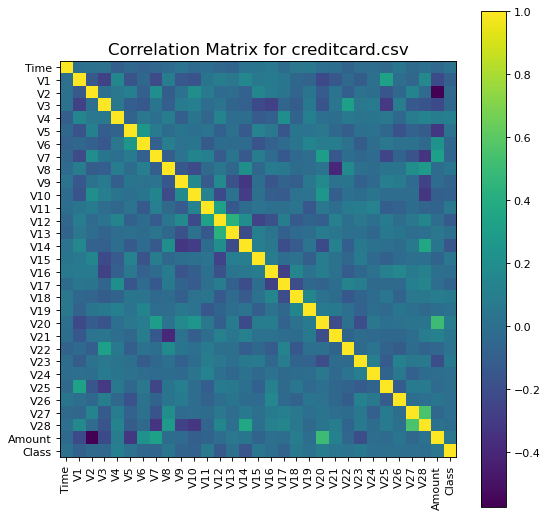

In [8]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

/tmp/ipykernel_6664/950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


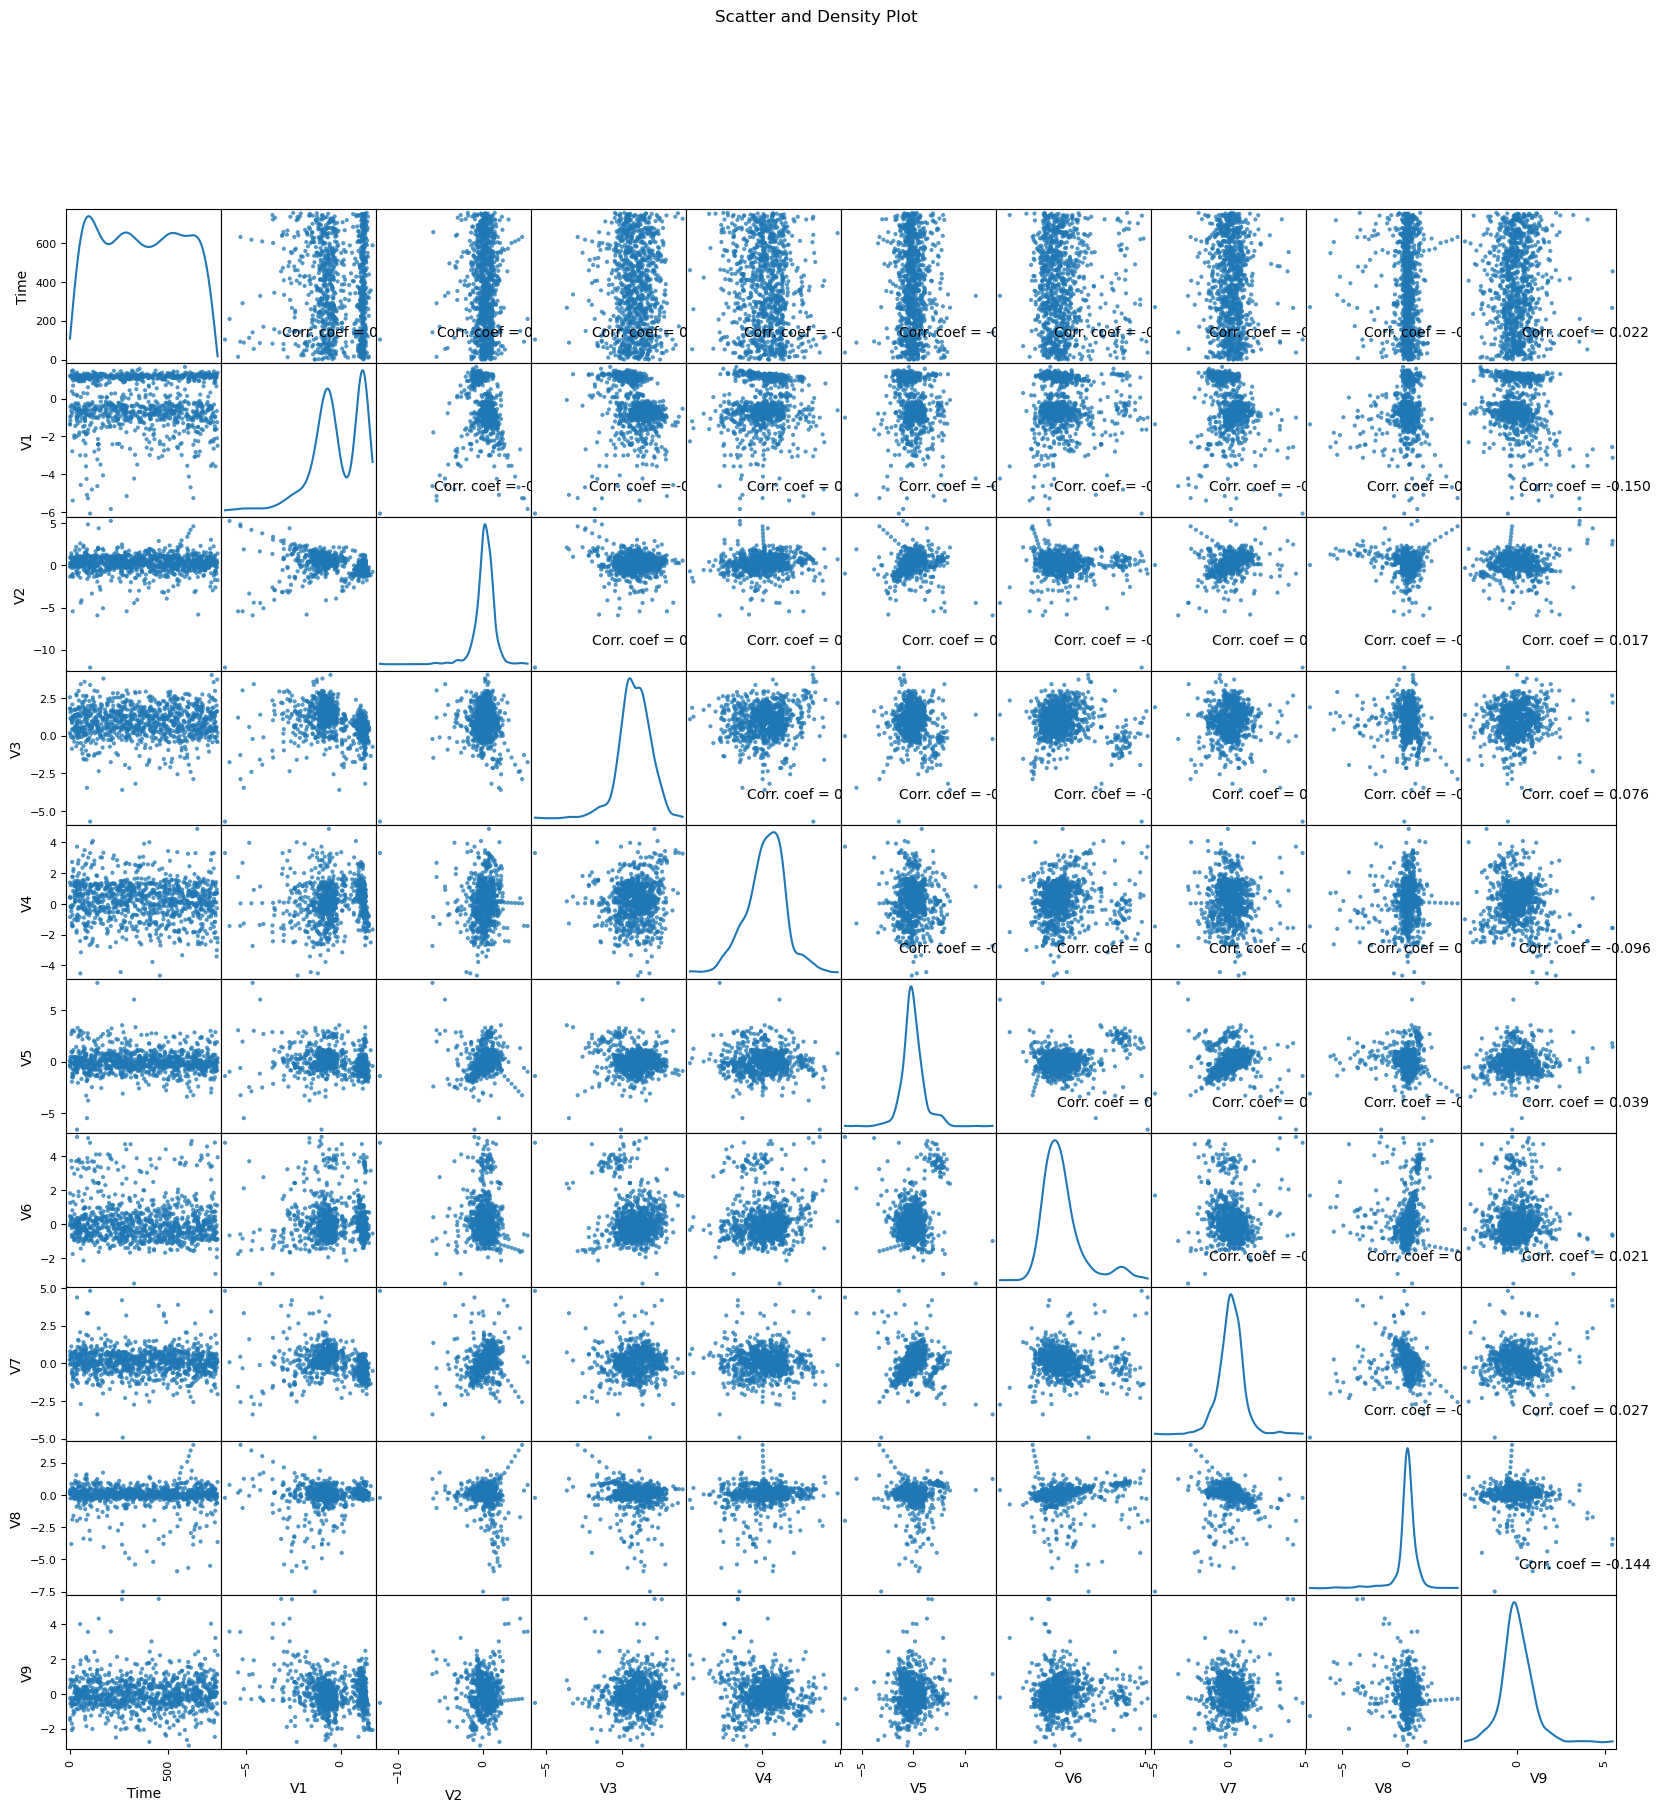

In [9]:
plotScatterMatrix(df1, 20, 10)

In [10]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<a id="split"></a>
### Split the data for training

In [11]:
y = df1['Class']

In [12]:
x = df1.drop(columns=['Time', 'Amount'])

In [13]:
x = x.to_numpy()
y = y.to_numpy()

In [14]:
y[np.where(y == 0)] = -1

In [15]:
w = np.ones(len(x[0]))

<a id="definition"></a>
### Definition

<img align="left" style="padding: 50px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png">

<p style="padding: 10px"> In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting) </p>

[https://en.wikipedia.org/wiki/Support_vector_machine](https://en.wikipedia.org/wiki/Support_vector_machine)

<a id="implementation"></a>
# Implementation

<a id="loss_fn"></a>
#### Loss function

In [16]:
def hinge_loss_fn(y, y_hat):
    return np.maximum(0,(np.ones(len(y)) - y * y_hat))

<a id="forward_fn"></a>
#### Forward function

In [17]:
def forward(x, w):
    return np.dot(x, w)

<a id="svm_fn"></a>
#### SVM function

In [18]:
def svm_fn(x, y, w, epoch):
    if (y * forward(x, w)) < 1:
        return ( (x * y) + (-2  * (1/epoch) * w) )
    else:
        return (-2 * (1/epoch) * w)

<a id="optimize_fn"></a>
#### Optimize function (SGD)

In [19]:
def optimize(w, dw, lr):
    w += lr * dw
    return w

<a id="training_fn"></a>
#### Training function

In [20]:
def svm(x, y, w, epochs=1601, lr=0.001):

    losses = []
    
    for epoch in range(1,epochs):
        for i, _ in enumerate(x):
            dw = svm_fn(x[i], y[i], w, epoch)
            w = optimize(w, dw, lr)
                
        if(epoch % 100 == 0):
            loss = hinge_loss_fn(y, np.dot(x, w)).mean()
            losses.append(loss)
            print("Epoch ", epoch, " - Hinge Loss ", loss)

    return w, losses

In [21]:
w = np.zeros(len(x[0]))

In [22]:
w, losses = svm(x, y, w)

Epoch  100  - Hinge Loss  0.05758884642562879
Epoch  200  - Hinge Loss  0.02484581461087424
Epoch  300  - Hinge Loss  0.010898763202507879
Epoch  400  - Hinge Loss  0.0046216438932423385
Epoch  500  - Hinge Loss  0.003662965260835676
Epoch  600  - Hinge Loss  0.0035280934072686584
Epoch  700  - Hinge Loss  0.003227042471840689
Epoch  800  - Hinge Loss  0.003243989292845794
Epoch  900  - Hinge Loss  0.003015677657066042
Epoch  1000  - Hinge Loss  0.002845848147862968
Epoch  1100  - Hinge Loss  0.002676182585381579
Epoch  1200  - Hinge Loss  0.0025653477316891714
Epoch  1300  - Hinge Loss  0.0024168330091341676
Epoch  1400  - Hinge Loss  0.0022943136516074105
Epoch  1500  - Hinge Loss  0.0021211705208140975
Epoch  1600  - Hinge Loss  0.0020356886836224108


In [23]:
pred = forward(x, w)

<a id="results"></a>
# Results analysis

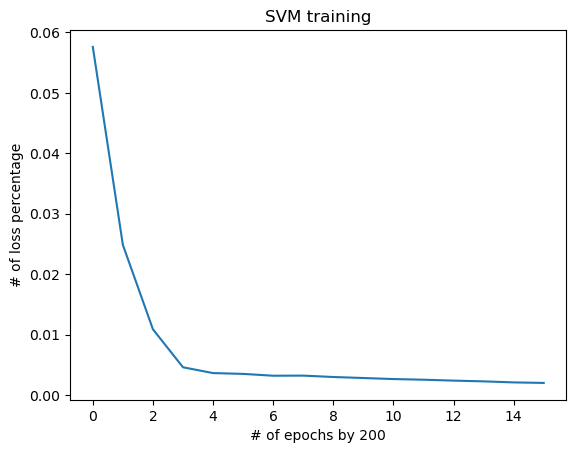

In [24]:
plt.title('SVM training')
plt.xlabel('# of epochs by 200')
plt.ylabel('# of loss percentage')
plt.plot(losses)

In [25]:
def accuracy(y_hat, y):
    # get the number of card frauds predicted
    pred_fraud = len(np.where(np.ceil(pred) > 0)[0])
    # actual fraud numbers
    actual_fraud = len(np.where(y > 0)[0])
    
    return pred_fraud/actual_fraud

In [26]:
accuracy(pred, y)

1.0

<a id="conclusion"></a>
# Conclusion

As we can see, the model created a classifier that detects between fraud and non-fraud for credit cards.